In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
# 확률 함수(0.1~1 사이 보기)
def P(beta):
    return 1 - np.exp(-2 * beta)

# 이웃 확인 함수
def neighbors(i,j,L):
    neighbors = [(i, (j + 1) % L), (i, (j - 1) % L), ((i + 1) % L, j), ((i - 1) % L, j)] # 오,왼,아래, 위
    return neighbors

In [3]:
# random seed spin을 뽑는다
L = 5
seed_spin = np.random.choice([-1, 1], size = (L, L))

# 무작위로 하나의 스핀을 선택
i = rd.randint(0,L-1) # 행 인덱스
j = rd.randint(0,L-1) # 열 인덱스
rd_spin = seed_spin[i,j]

# 이웃이 같은 방향인지 확인
beta = 0.1
stack = [(i,j)]
cluster = [(i,j)]

choice_spin_neighbor_list = neighbors(i,j,L) # 추출된 스핀의 이웃들을 찾고
print(choice_spin_neighbor_list)

[(1, 2), (1, 0), (2, 1), (0, 1)]


In [4]:
def cluster_flip(seed_spin, L, beta): # seed_spin을 넣고 L과 beta를 정해주면 cluster_flip이 일어난 행렬을 반환해주는 함수

    # 무작위로 스핀을 하나 뽑는다.
    i = rd.randint(0,L-1)
    j = rd.randint(0,L-1)
    rd_spin = seed_spin[i,j]

    # 스택과 클러스터에 저장
    stack = [(i,j)]
    cluster = [(i,j)]

    # 스택의 모든 원소가 사라질때까지 반복문 돌림
    while stack:
        i,j = stack.pop() # stack에서 스핀 하나 추출
        choice_spin = seed_spin[i,j] # 변수에 지정
        choice_spin_neighbor_list = neighbors(i,j,L) # 추출된 스핀의 이웃들을 찾고
        for k in choice_spin_neighbor_list: # 그 이웃들과 추출된 스핀이 같은지 확인하여
            if seed_spin[k] == choice_spin: # 같으면
              if rd.random() < P(beta): # 확률만큼 받기
                  if (k[0], k[1]) not in cluster:  # 중복 추가 방지
                        stack.append((k[0], k[1]))
                        cluster.append((k[0], k[1]))

    # cluster에 있는 spin들을 flip 한다.
    for f_row, f_col in cluster:
        seed_spin[f_row, f_col] *= -1

    return seed_spin

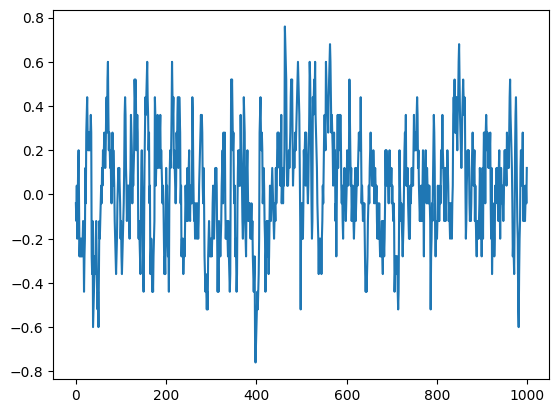

In [5]:
S_list = []
seed_spin = np.random.choice([-1, 1], size = (L, L))

for i in range(1000):
    seed_spin = cluster_flip(seed_spin, 5, 0.1)
    m = np.sum(seed_spin)/(L*L)
    S_list.append(m)

plt.plot([i for i in range(1000)],S_list)
plt.show()

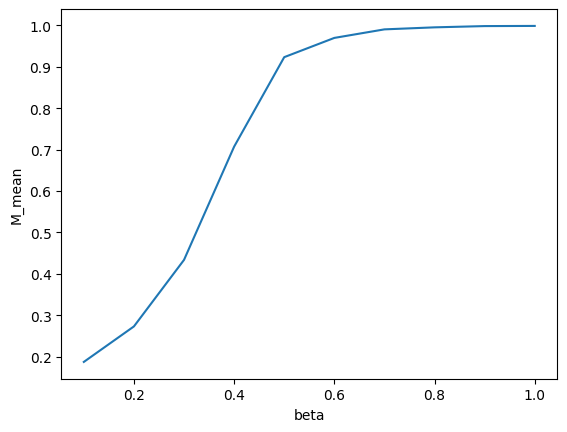

In [6]:
beta_list = np.linspace(0.1, 1, 10)
M_mean_list = []
m_list = []
s_list = []
for i in beta_list:
    m_list = []
    seed_spin = np.random.choice([-1, 1], size = (L, L))
    for j in range(1000):
        seed_spin = cluster_flip(seed_spin, 5, i) # flip된 시드 스핀이 나옴, L = 5
        m = np.mean(seed_spin)
        m_list.append(abs(m))
    M_mean_list.append(np.mean(m_list))

plt.plot(beta_list, M_mean_list)
plt.xlabel('beta')
plt.ylabel('M_mean')
plt.show()